## Python 自动发送邮件&windows定时发送

####  -  smtp协议：简单邮件传输协议，控制邮件从某个地方到另一个地方，python 内置smtp模块
####  - MIME,多用途互联网邮件扩展类型, 当该某种扩展名文件被访问的时候，浏览器会自动使用指定应用程序来打开

- smtplib 模块：主要负责发送邮件，连接服务器，登录邮箱，发送邮件
- email模块：主要负责构造邮件内容，收件人，发送人，主题，正文，附件等

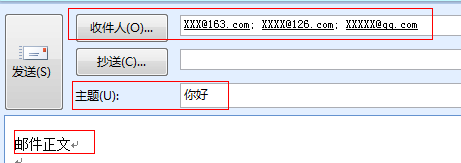

#### smtplib模块

In [ ]:
import smtplib 

smtp = smtplib.SMTP()

smtp.connect(host,port)  #host： 服务器地址 举例：smtp.exmail.qq.com ,默认端口： 25

  eq : smtp.connect('smtp.exmail.qq.com',"25")

smtp.login(username,password) #登陆邮箱账号，注意登陆密码，一般要客户段密码，需要在网页获得授权码

  eq : smtp.login('cdliubo@lixin360.com','E6yLk3UdaxA95D8V')

smtp.sendmail(sender, receiver + copy,msg.as_string()) #发送邮件
  eq : 
        FROM = 'cdliubo@lixin360.com' # sender 
        TO= 'cdliubo@lixin360.com' # receiver 
        CC = 'cdliubo@lixin360.com,cdliubo@lixin360.com' # copy
        smtp.sendemail(FROM,TO.split(',') + CC.split(','),msg.as_string())
        
smtp.starttls() #加密传输邮件
smtp.quit() #退出服务器

#### email模块

In [4]:
from email.header import Header # 邮件标题
from email.mime.multipart import MIMEMultipart  # 邮件主体
from email.mime.text import MIMEText  # 邮件文本内容
from email.mime.image import MIMEImage # 邮件图片
from email.mime.application import MIMEApplication # 邮件附件
from email.utils import formataddr # 分隔标题与地址
formataddr([Header('自定义发信昵称','utf-8'),FROM])

* 邮件标题


In [14]:
from email.header import Header # 邮件标题
SUBJECT = Header("邮件自动发送", 'utf-8').encode() # 通过Header对象编码的文本

* 构造邮件对象

In [ ]:
from email.mime.multipart import MIMEMultipart  # 邮件主体
MIMEMultipart（）#构造邮件对象
msg1 = MIMEMultipart('mixed')  #创建带附件的实例
msg2 = MIMEMultipart('related')  #创建内嵌资源的实例，、
msg3 = MIMEMultipart('alternative') #创建纯文本与超文本实例

* 构造邮件内容——文本

In [ ]:
from email.mime.text import MIMEText  # 邮件文本内容
# 纯文本对象
text = 'Just do it'
text_plain = MIMEText(text,'Plain','utf-8') 邮件正文，文本类型， 编码格式

In [ ]:
# html对象
html = """ <font color=black> 各位好 : 
<br>
<br>&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp>> &nbsp数据详细如下：
<br>
<br>&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp<img src=\"cid:pic1\" border=\"3\">
<br>
<br>
<br>&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp>> &nbsp当日情况如下：
<br>&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp<img src=\"cid:pic2\" border=\"3\">
<br>
<br>
<br>&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp以上，祝好！！</font>
"""    
text_html = MIMEText(html,'html','utf-8')

msg2.attach(text_plain)
msg2.attach(text_html)

* 构造邮件内容——图片

In [15]:
from email.mime.image import MIMEImage # 邮件图片
sendimagefile=open('C:\\Users\\Administrator.HY3OX3VOYDNHDXM\\Desktop\\1.png','rb').read() #读取图片文件
image = MIMEImage(sendimagefile) 图片对象
image.add_header('Content-ID','pic1')#指定文件的Content-ID,<img>
msg2.attach(image)

* 构造邮件内容——附件

In [ ]:
from email.mime.application import MIMEApplication # 邮件附件
xlsxfile = '1.xlsx'
csv = MIMEApplication(open('C:\\Users\\Administrator.HY3OX3VOYDNHDXM\\Desktop\\1.png','rb').read()) 附件对象
csv.add_header('Content-Disposition', 'attachment', filename=('gbk', '', xlsxfile)) #附件标题
msg.attach(csv)

### 实例代码示例

In [ ]:
# In[99] 发送邮件
from email.header import Header
from email.mime.multipart import MIMEMultipart  
from email.mime.text import MIMEText  
from email.mime.image import MIMEImage 
from email.mime.application import MIMEApplication
from email.utils import formataddr
import smtplib
import datetime

def addimg(src,imgid):  
    fp = open(src, 'rb')  
    msgImage = MIMEImage(fp.read())  
    fp.close()  
    msgImage.add_header('Content-ID', imgid)  
    return msgImage  

date = (datetime.date.today() + datetime.timedelta(days=-1)).strftime("%Y%m%d")
SUBJECT = Header('直销全流程监控' + now_time, 'utf-8').encode()  # 标题
HOST = 'smtp.exmail.qq.com' 
FROM = 'cdliubo@lixin360.com'
TO = 'cdliubo@lixin360.com'
CC = 'cdliubo@lixin360.com,18801737494@163.com'
msg = MIMEMultipart('related') 
##邮件内容 
msgtext = MIMEText('''<font color=black> 各位好 : 
<br>
<br>&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp>> &nbsp直销41个分公司本月有效进件，全流程各个状态数量数据详细如下：
<br>
<br>&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp<img src=\"cid:pic1\" border=\"3\">
<br>
<br>
<br>&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp>> &nbsp利薪方案、(新)利菁方案审批环节，档位通过率本月以及当日情况如下：
<br>&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp<img src=\"cid:pic2\" border=\"3\">
<br>
<br>
<br>&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp以上，祝好！！</font>''',"html","utf-8")  
msg.attach(msgtext)  

#添加图片
msg.attach(addimg(load + now_time + ".png","pic1"))  
msg.attach(addimg('E:\\project\\zhixiao_day_data\\档位通过率' + now_time + ".png","pic2"))  

#添加附件
csvFile = '直销全流程监控' + now_time + '.xlsx'
csv = MIMEApplication(open(load + now_time + '.xlsx','rb').read())
csv.add_header('Content-Disposition', 'attachment', filename=('gbk', '', csvFile))
msg.attach(csv)

msg['Subject'] = SUBJECT  
msg['From']=FROM  
msg['To']=TO  
msg['Cc']=CC
server = smtplib.SMTP()  
server.connect(HOST,"25")  
server.starttls()  
server.login('cdliubo@lixin360.com','E6yLk3UdaxA95D8V')   
server.sendmail(FROM, TO.split(',') + CC.split(','), msg.as_string())  
server.quit()  